In [5]:
from keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
train_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='training',
                                               )
valid_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='validation',
                                               )

Using TensorFlow backend.


Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


In [0]:
from model import AlexNet
model = AlexNet((224, 224, 3), 101)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n//train_generator.batch_size, 
                              validation_data=valid_generator, 
                              validation_steps=valid_generator.n//valid_generator.batch_size, 
                              epochs=50, 
                             )

W0708 09:47:24.890864 140513404237696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
218/218 [==============================] - 27s 126ms/step - loss: 4.2973 - acc: 0.0912 - val_loss: 4.1632 - val_acc: 0.0938
Epoch 2/50
218/218 [==============================] - 20s 90ms/step - loss: 4.1134 - acc: 0.0961 - val_loss: 4.0144 - val_acc: 0.1161
Epoch 3/50
218/218 [==============================] - 19s 89ms/step - loss: 4.0405 - acc: 0.1070 - val_loss: 3.9959 - val_acc: 0.1137
Epoch 4/50
218/218 [==============================] - 19s 89ms/step - loss: 3.9968 - acc: 0.1255 - val_loss: 3.8936 - val_acc: 0.1395
Epoch 5/50
218/218 [==============================] - 20s 90ms/step - loss: 3.5689 - acc: 0.2444 - val_loss: 3.2263 - val_acc: 0.3013
Epoch 6/50
218/218 [==============================] - 19s 89ms/step - loss: 2.9692 - acc: 0.3510 - val_loss: 2.9146 - val_acc: 0.3626
Epoch 7/50
218/218 [==============================] - 19s 89ms/step - loss: 2.6007 - acc: 0.4094 - val_loss: 2.6034 - val_acc: 0.4185
Epoch 8/50
218/218 [==============================] - 19s 89m

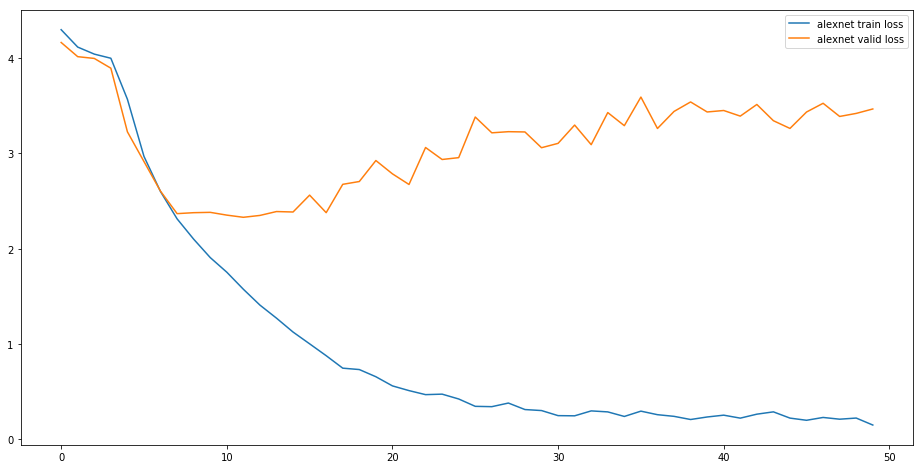

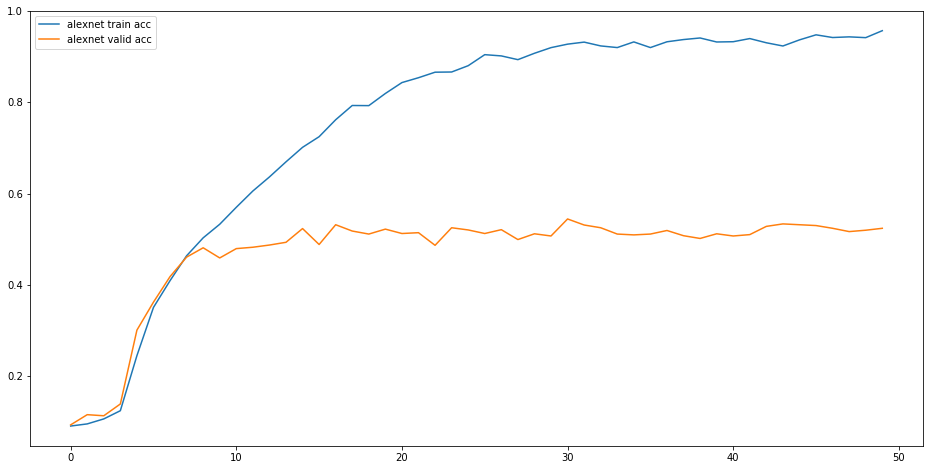

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='alexnet train loss')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='alexnet valid loss')
plt.legend(loc=0)
plt.savefig('loss.png')

plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='alexnet train acc')
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='alexnet valid acc')
plt.legend(loc=0)

plt.savefig('accuracy.png')